# Decision Tree Project

## Import your needed libraries and read data
some of the libraries you need have been imported already

In [113]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix



In [72]:
#TODO
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("test.csv")
train_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,46,Other,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,30,Positive,Positive,19,10,31,Alive
1,51,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,80,Positive,Positive,20,12,79,Alive
2,62,White,Single,T1,N1,IIA,Poorly differentiated,3,Regional,20,Positive,Positive,1,1,60,Alive
3,55,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,55,Positive,Positive,4,2,74,Alive
4,57,White,Divorced,T1,N1,IIA,Poorly differentiated,3,Regional,6,Negative,Negative,2,1,68,Alive


## Getting to know your data


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     30 non-null     int64 
 1   Race                    30 non-null     object
 2   Marital Status          30 non-null     object
 3   T Stage                 30 non-null     object
 4   N Stage                 30 non-null     object
 5   6th Stage               30 non-null     object
 6   differentiate           30 non-null     object
 7   Grade                   30 non-null     int64 
 8   A Stage                 30 non-null     object
 9   Tumor Size              30 non-null     int64 
 10  Estrogen Status         30 non-null     object
 11  Progesterone Status     30 non-null     object
 12  Regional Node Examined  30 non-null     int64 
 13  Reginol Node Positive   30 non-null     int64 
 14  Survival Months         30 non-null     int64 
 15  Status  

In [5]:
profile = ProfileReport(train_df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
custom_info = pd.DataFrame({
                "dtype" : train_df.dtypes,
                "n_unique" : train_df.nunique()
                } , index=train_df.columns)
cat_columns = list(custom_info[custom_info["dtype"] == "object"].index)

['Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status']

## Preprocessing

as you seen "Grade" and "differentiate" are the same. therfore we drop the "differentiate"

In [93]:
def age_spliter(data):
    if 33<=data<42:
        return 0
    elif 42<=data<51:
        return 1
    elif 51 <= data < 60:
        return 2
    else:
        return 3


In [96]:
clean_data = pd.concat([train_df.drop(cat_columns[:-1] , axis=1) , pd.get_dummies(train_df[cat_columns[:-1]] , dtype=float)] ,axis=1)
clean_data["Status"] = clean_data["Status"].apply(lambda x : 1 if x=="Alive" else 0)
#clean_data["Age"] = clean_data["Age"].apply(age_spliter)
clean_data.head()

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,...,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Well differentiated,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,46,2,30,19,10,31,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,51,3,80,20,12,79,1,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,62,3,20,1,1,60,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,55,2,55,4,2,74,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,57,3,6,2,1,68,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


(array([ 6.,  4., 12.,  8.]),
 array([33., 42., 51., 60., 69.]),
 <BarContainer object of 4 artists>)

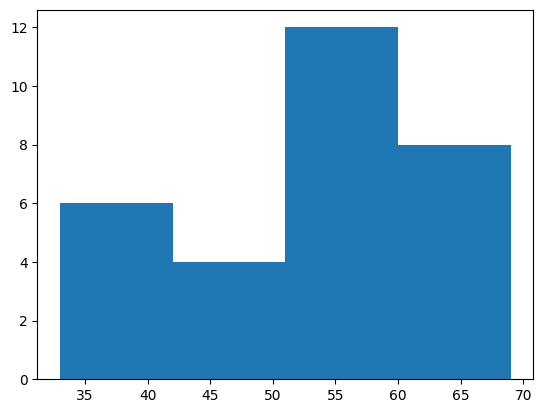

In [97]:
plt.hist(x=clean_data["Age"], bins= 4)

<Axes: >

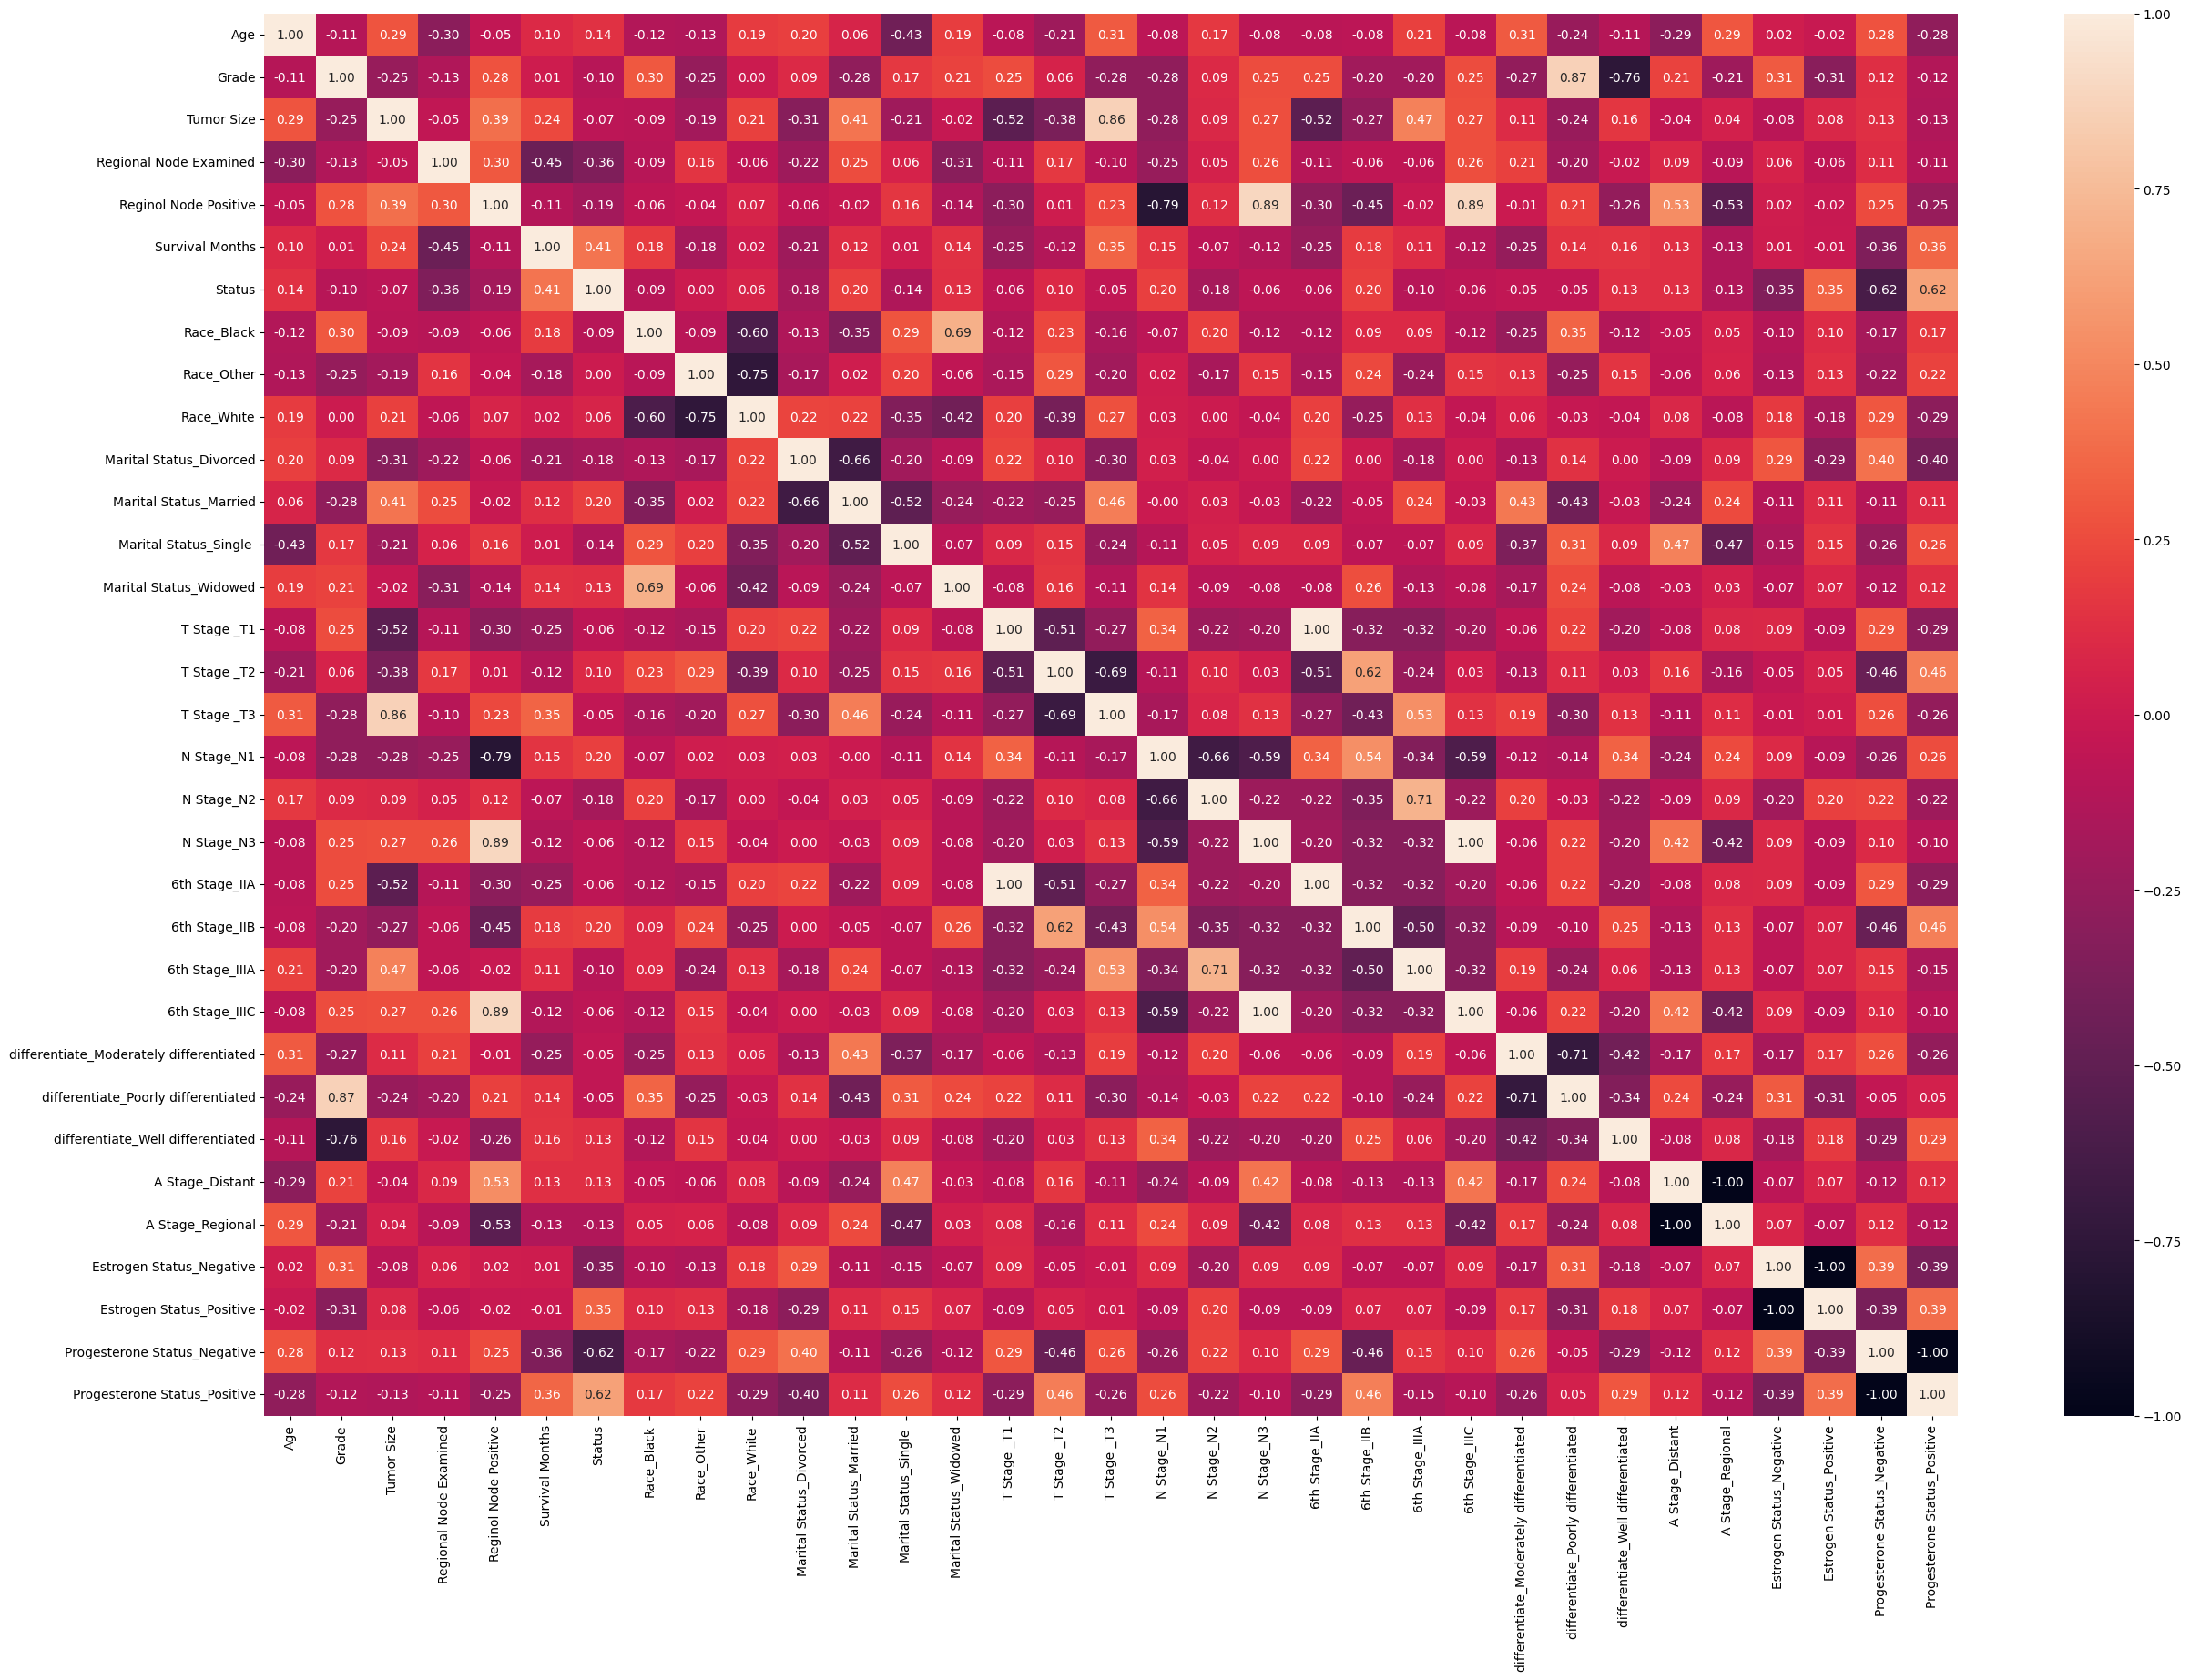

In [119]:
plt.figure(figsize=(30, 20))
sns.heatmap(clean_data.corr() ,annot=True , fmt="0.2f")

In [99]:
def PreProcessing(df):
    clean_data = df.drop("differentiate" , axis=1)
    clean_data = pd.concat([train_df.drop(cat_columns[:-1] , axis=1) , pd.get_dummies(train_df[cat_columns[:-1]] , dtype=float)] ,axis=1)
    clean_data["Status"] = clean_data["Status"].apply(lambda x : 1 if x=="Alive" else 0)
    return clean_data

clear_data = PreProcessing(train_df)


In [100]:
clear_data.head()

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,...,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Well differentiated,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,46,2,30,19,10,31,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,51,3,80,20,12,79,1,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,62,3,20,1,1,60,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,55,2,55,4,2,74,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,57,3,6,2,1,68,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Test Data Prediction and Evaluation

In [105]:
X_train = clear_data.drop("Status" ,axis=1)
y_train = clear_data["Status"]

In [106]:
clear_test_data = PreProcessing(test_df)
X_test = clear_test_data.drop("Status" ,axis=1)
y_test = clear_test_data["Status"]

In [107]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their ranges for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],         
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10, 20],      
    'min_samples_leaf': [1, 2, 4, 6, 8],      
    'max_features': [None, 'auto', 'sqrt', 'log2'], 
    'splitter': ['best', 'random']           
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score:", best_score)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}
Best Cross-validation Score: 0.8333333333333334
Test Set Accuracy: 0.8666666666666667


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.80      0.89        20

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30



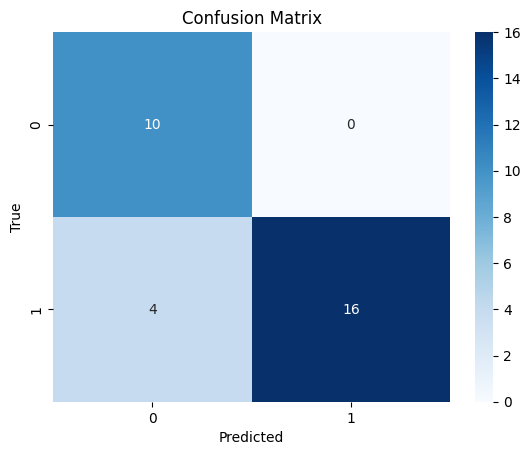

In [110]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [116]:
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],                 
    'max_depth': [None, 10, 20, 30],                 
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                   
    'max_features': ['auto', 'sqrt', 'log2'],        
    'bootstrap': [True, False],                      
    'criterion': ['gini', 'entropy']                 
}


grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search2.fit(X_train, y_train)


best_params = grid_search2.best_params_
best_score = grid_search2.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score:", best_score)


best_model = grid_search2.best_estimator_
y_pred2 = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.8333333333333334
Test Set Accuracy: 0.9


c:\Users\SAM-Tech\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.90      0.95      0.93        20

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.88        30
weighted avg       0.90      0.90      0.90        30



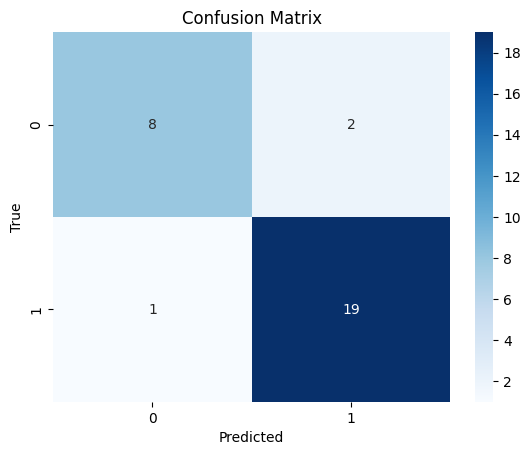

In [117]:
print(classification_report(y_test,y_pred2))

cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()